### Import Python packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [3]:
# read data
data = pd.read_csv("DS3_C1_S4_SuperstoreSales_Data_Challenge.csv",parse_dates=['Order Date']).set_index('Order Date')
data.head()

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092


In [4]:
furniture_data = data.resample('M').mean()
furniture_data.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-31,4433.300000,53017.650000,312.126250,3.500000,0.135000,40.273325
2014-02-28,6353.285714,66296.571429,262.808286,3.285714,0.114286,17.241671
2014-03-31,5835.939394,58027.666667,441.635030,3.969697,0.230303,-34.201667
2014-04-30,4829.115385,65488.730769,305.570654,3.115385,0.132692,21.322312
2014-05-31,4806.750000,57519.791667,288.032792,4.041667,0.256250,-14.578233


### Data Visualization

In [5]:
sales_data = furniture_data['Sales']
sales_data.head()

Order Date
2014-01-31    312.126250
2014-02-28    262.808286
2014-03-31    441.635030
2014-04-30    305.570654
2014-05-31    288.032792
Freq: M, Name: Sales, dtype: float64

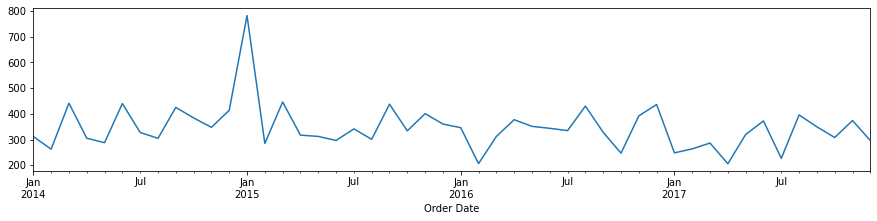

In [9]:
sales_data.plot(figsize=(15,3));

### Data Decomposition

Text(0.5, 1.0, 'Random')

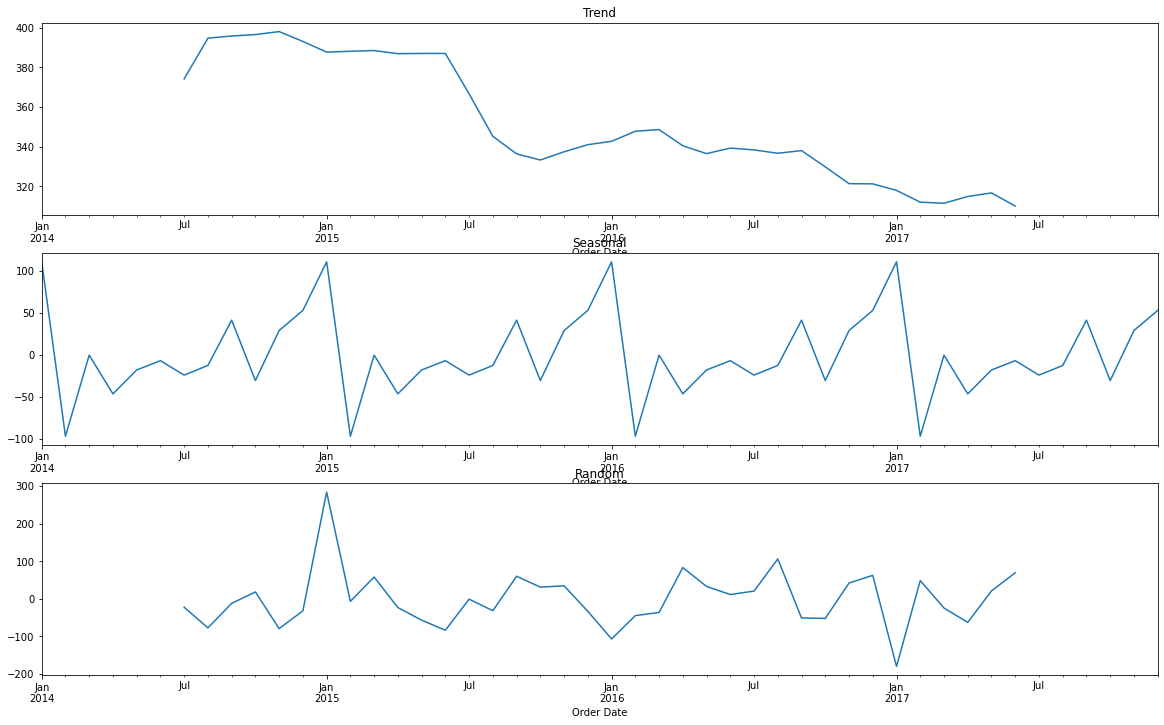

In [10]:

fig,ax = plt.subplots(3,1,figsize=(20,12))

result = seasonal_decompose(sales_data, model='additive')

# result.trend.plot(figsize=(8,6),ax=ax[0])
result.trend.plot(ax=ax[0])
ax[0].set_title("Trend")

result.seasonal.plot(ax=ax[1])
ax[1].set_title("Seasonal")

result.resid.plot(ax=ax[2])
ax[2].set_title("Random")


### Check for stationarity

In [11]:
# ADF test to determine data stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return(msg)

In [12]:
# check if the sales data is stationary
checkStationarity(sales_data)

'pvalue=9.093398510006677e-10. Data is Stationary. Proceed to model building'

### Split the data into train and test parts

In [13]:
# split the data into train and test
ss = int(0.7 * len(sales_data))

train_df = sales_data.iloc[:ss]
test_df = sales_data.iloc[ss:]
print("train = {}, test = {}".format(len(train_df), len(test_df)))
#train=train_df['Sales']
#test=test_df['Sales']

train = 33, test = 15


### Plot ACF and PACF

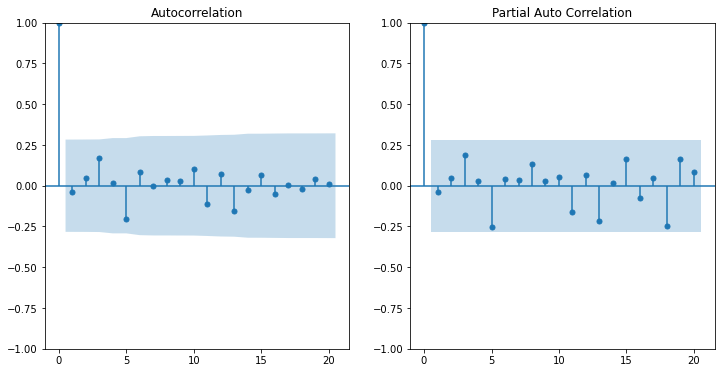

In [14]:
# ACF and PACF plots
ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(furniture_data['Sales'], lags=20, ax=ax[0]);
plt.title("Auto Correlation")

plot_pacf(furniture_data['Sales'], lags=20, ax=ax[1]);
plt.title("Partial Auto Correlation")

plt.show()

### Build the SARIMA model

In [15]:
p=1;d=0;q=1; season_order=12

model = SARIMAX(sales_data, order=(p,d,q), seasonal_order=(p,d,q,season_order)).fit()
warnings.filterwarnings('ignore')

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -291.738
Date:                            Sun, 25 Dec 2022   AIC                            593.477
Time:                                    23:36:05   BIC                            602.833
Sample:                                01-31-2014   HQIC                           597.012
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9903      0.017     58.222      0.000       0.957       1.024
ma.L1         -0.7447      0.148     -5.019      0.000      -1.035      -0.454
ar.S.L12       0.9981      0.937      1.065      0.287      -0.839       2.835
ma.S.L12      -0.9779      5.506     -0.178      0.859     -11.770       9.814
sigma2      9615.6814   4.27e+04      0.225      0.822    -7.4e+04    9.32e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                27.25
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predict sales figures using the test data

In [16]:
len(sales_data)

48

In [17]:
# forecast on test data
predictions = model.predict(start=39,end=48,dynamic=True)

In [18]:
print('test = {}, predictions = {}'.format(len(test_df), len(predictions)))

test = 15, predictions = 10


In [19]:
train_df.tail()

Order Date
2016-05-31    425.912392
2016-06-30    318.447364
2016-07-31    332.354105
2016-08-31    475.359306
2016-09-30    343.503452
Freq: M, Name: Sales, dtype: float64

In [21]:
test_df.head()

Order Date
2016-10-31    277.905122
2016-11-30    362.402333
2016-12-31    450.252537
2017-01-31    418.826524
2017-02-28    349.978467
Freq: M, Name: Sales, dtype: float64

In [22]:
print(predictions)

2017-04-30    310.905747
2017-05-31    327.787020
2017-06-30    325.903772
2017-07-31    331.602033
2017-08-31    348.280257
2017-09-30    345.638985
2017-10-31    331.002086
2017-11-30    324.437937
2017-12-31    341.758455
2018-01-31    368.297047
Freq: M, Name: predicted_mean, dtype: float64


In [23]:
# actual vs. predicted values
# print("test = {}, predicted = {}".format(len(test), len(predictions) ))
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test_df[i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

       actual   predicted         err
0  277.905122  310.905747  -33.000624
1  362.402333  327.787020   34.615314
2  450.252537  325.903772  124.348765
3  418.826524  331.602033   87.224490
4  349.978467  348.280257    1.698209
5  259.023130  345.638985  -86.615855
6  248.982204  331.002086  -82.019882
7  222.887965  324.437937 -101.549972
8  339.276830  341.758455   -2.481625
9  250.820366  368.297047 -117.476681


In [24]:
# MSE
mean_squared_error(df_res.actual,df_res.predicted)

6370.976530853999

<AxesSubplot:>

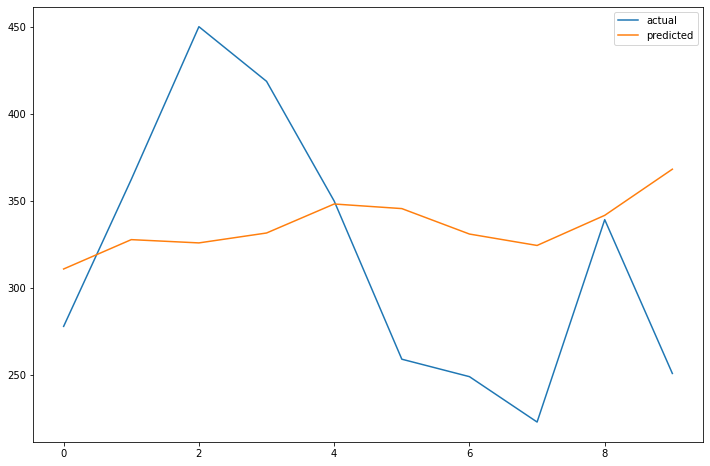

In [25]:
# plot
df_res[['actual','predicted']].plot(figsize=(12,8))

### Forecast the data for future

In [46]:
# forecast into the future
m2 = SARIMAX(sales_data,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
fcast = m2.predict(start=len(sales_data), end=len(sales_data)+20).rename('Forecast')
print(fcast)

2017-12-31    334.526307
2018-01-31    362.016837
2018-02-28    304.916855
2018-03-31    323.820795
2018-04-30    286.472913
2018-05-31    300.317715
2018-06-30    309.081469
2018-07-31    306.818078
2018-08-31    335.434514
2018-09-30    326.444979
2018-10-31    311.820216
2018-11-30    310.130605
2018-12-31    324.881710
2019-01-31    352.425606
2019-02-28    295.499969
2019-03-31    314.467774
2019-04-30    277.263908
2019-05-31    291.178027
2019-06-30    300.017515
2019-07-31    297.844854
2019-08-31    326.506625
Freq: M, Name: Forecast, dtype: float64


<AxesSubplot:xlabel='Order Date'>

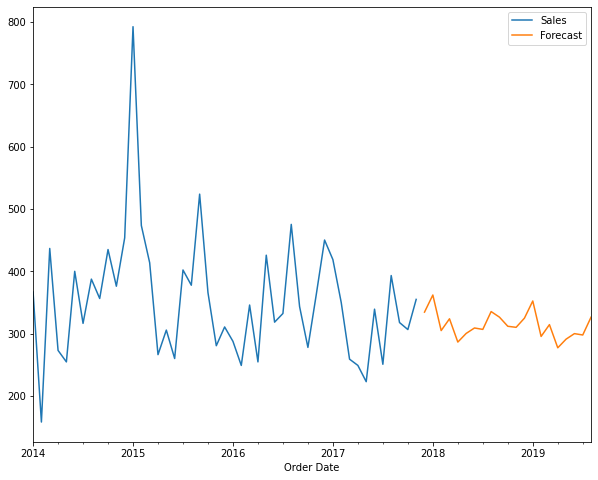

In [47]:
sales_data.plot(figsize=(10,8),legend=True)
fcast.plot(legend=True)